In [ ]:
import pandas as pd
df = pd.read_csv("Tweets.csv")

In [2]:
#We only need the text and sentiment columns for our analysis
review_df = df[['text', 'airline_sentiment']]

print(review_df.shape)
review_df.head()

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
#we don't need neutral reviews in our dataset for this binary classification problem.
review_df = review_df[review_df['airline_sentiment'] != 'neutral']
print(review_df.shape)
review_df.head()

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [5]:
review_df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
positive    2363
Name: count, dtype: int64

In [6]:
#0 represents positive and 1 represents negative sentiment in the dataset
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], shape=(11541,)),
 Index(['positive', 'negative'], dtype='object'))

In [7]:
#retrieving all the text data from the dataset
tweet = review_df.text.values
tweet[:5]

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it",
       "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
       '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)'],
      dtype=object)

In [8]:
#Tokenizer - Tokenizes all of the words, breaking all the words/sentences of text
#into small parts called tokens. This is how NLP works with text data.
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

encoded_docs = tokenizer.texts_to_sequences(tweet)
from tensorflow.keras.preprocessing.sequence import pad_sequences
#Padding - The sequences of words are of different lengths. Padding is used to make all the sequences of equal length.
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [9]:
#LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D

from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
vocab_size = len(tokenizer.word_index) + 1
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout = 0.5, recurrent_dropout = 0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


c:\Users\kevin\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
history = model.fit(padded_sequence, sentiment_label[0], validation_split = 0.2, epochs = 5, batch_size = 32)

Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 120ms/step - accuracy: 0.7842 - loss: 0.5404 - val_accuracy: 0.8909 - val_loss: 0.2506
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 138s 480ms/step - accuracy: 0.8810 - loss: 0.2877 - val_accuracy: 0.9181 - val_loss: 0.1979
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 91s 314ms/step - accuracy: 0.9203 - loss: 0.2136 - val_accuracy: 0.9320 - val_loss: 0.1746
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 95s 329ms/step - accuracy: 0.9392 - loss: 0.1651 - val_accuracy: 0.9355 - val_loss: 0.1993
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 159s 550ms/step - accuracy: 0.9520 - loss: 0.1403 - val_accuracy: 0.9398 - val_loss: 0.1786


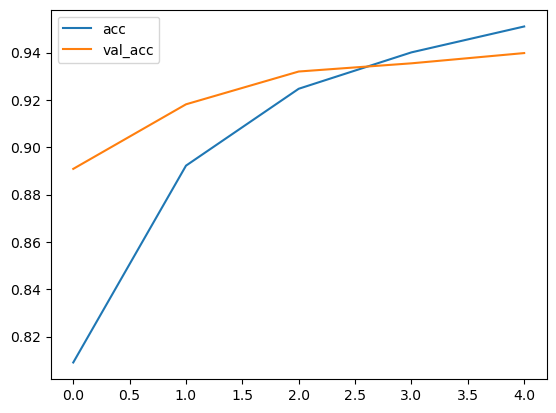

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

test_sentence3 = "This flight is pretty good."
predict_sentiment(test_sentence3)

test_sentence4 = "I will never fly with this airline again."
predict_sentiment(test_sentence4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted label:  positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label:  negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label:  positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted label:  negative
